# Load Libraries

In [855]:
# Import libraries
# Suppressing warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data visualisation and manipulation
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

# Plotly libraries
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

# Modeling algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier

# Model selection and evaluation
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve,f1_score
from sklearn.inspection import permutation_importance

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler,  LabelEncoder, OneHotEncoder

# Over-sampling for imbalance problem
from imblearn.over_sampling import SMOTE 

# Additional imports
from sklearn.datasets import load_iris
from scipy.stats import chi2_contingency


# Read the Data

In [856]:
data = pd.read_csv('HR-Employee-Attrition.csv')

In [857]:
# Visualizing the missing values
import seaborn as sns
import missingno as msno
%matplotlib inline

In [858]:
# Taking a glance at the data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [859]:
# Taking a glance at the datatypes
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [860]:
data.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [861]:
data.select_dtypes(include=['int64']).dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [862]:
data.shape

(1470, 35)

# Missing Values

In [863]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: >

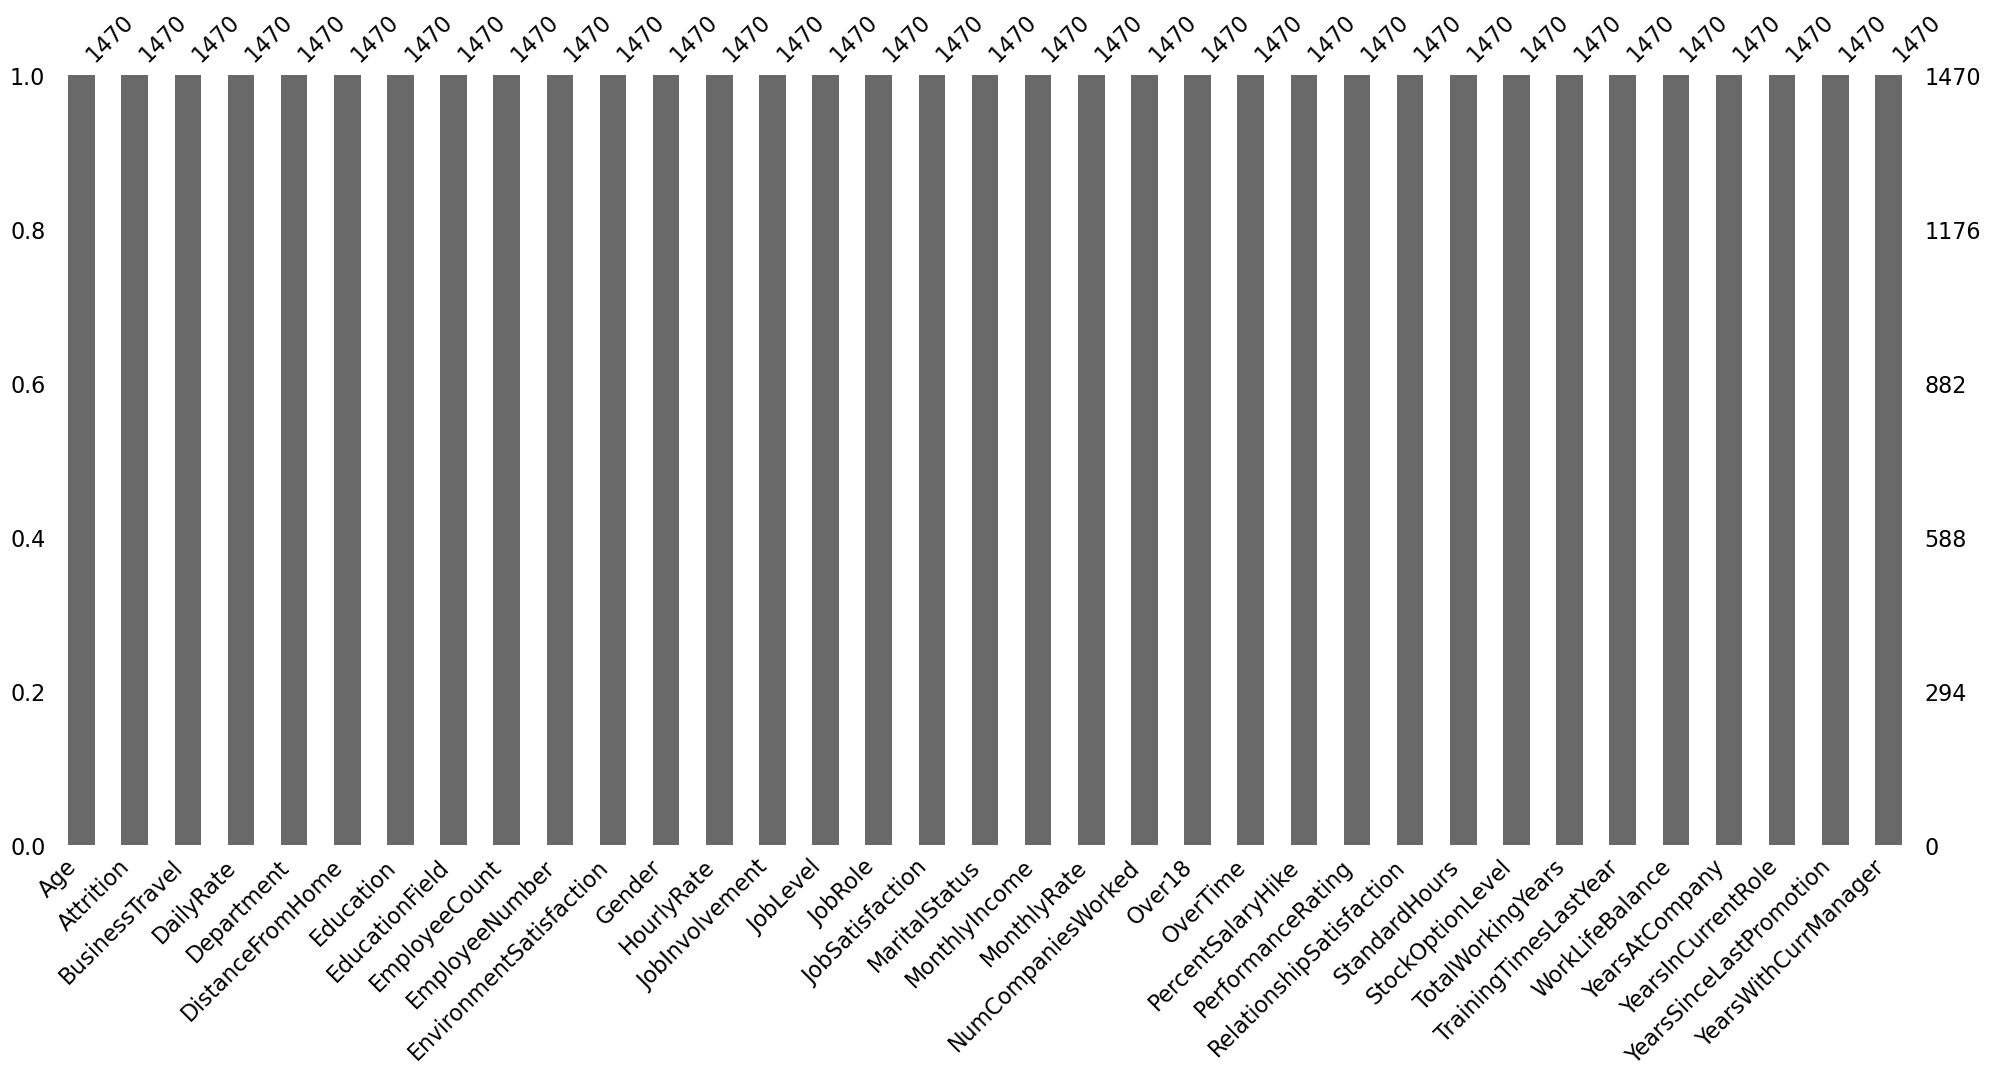

In [864]:
# There is no missing values in this dataset.
msno.bar(data)

In [865]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Drop useless features

In [866]:
# Drop useless features
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}")
    print("==========================================================")


Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [867]:
# The above attributes can be droped, because their values are useless.

data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
data.shape

(1470, 31)

# Reassign The Target

In [868]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [869]:
# let's encode the attrition column so we can use it for EDA
data['Attrition'] = data['Attrition'].factorize(['No','Yes'])[0]
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Exploratory Data Analysis (EDA)

In [870]:
# Attrition Rate
# The classes are skewed , and we need to solve this issue later.
print('No Attrition:', round(data['Attrition'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Attrition:', round(data['Attrition'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Attrition: 83.88 % of the dataset
Attrition: 16.12 % of the dataset


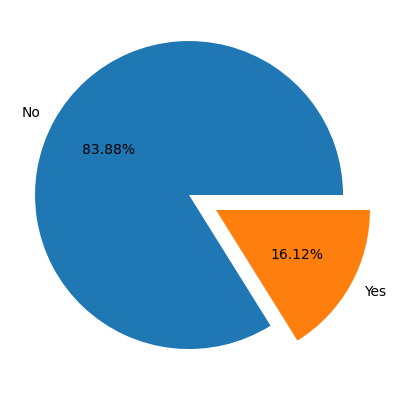

In [871]:
# Employee Attrition Distribution

plt.figure(figsize=(5,5))
pie = data.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.2f%%');

# 83.88% of the employees in the dataset have not left the company.
# The dataset is imbalanced because more people stay in the company than they leave.
# I will deal with it later


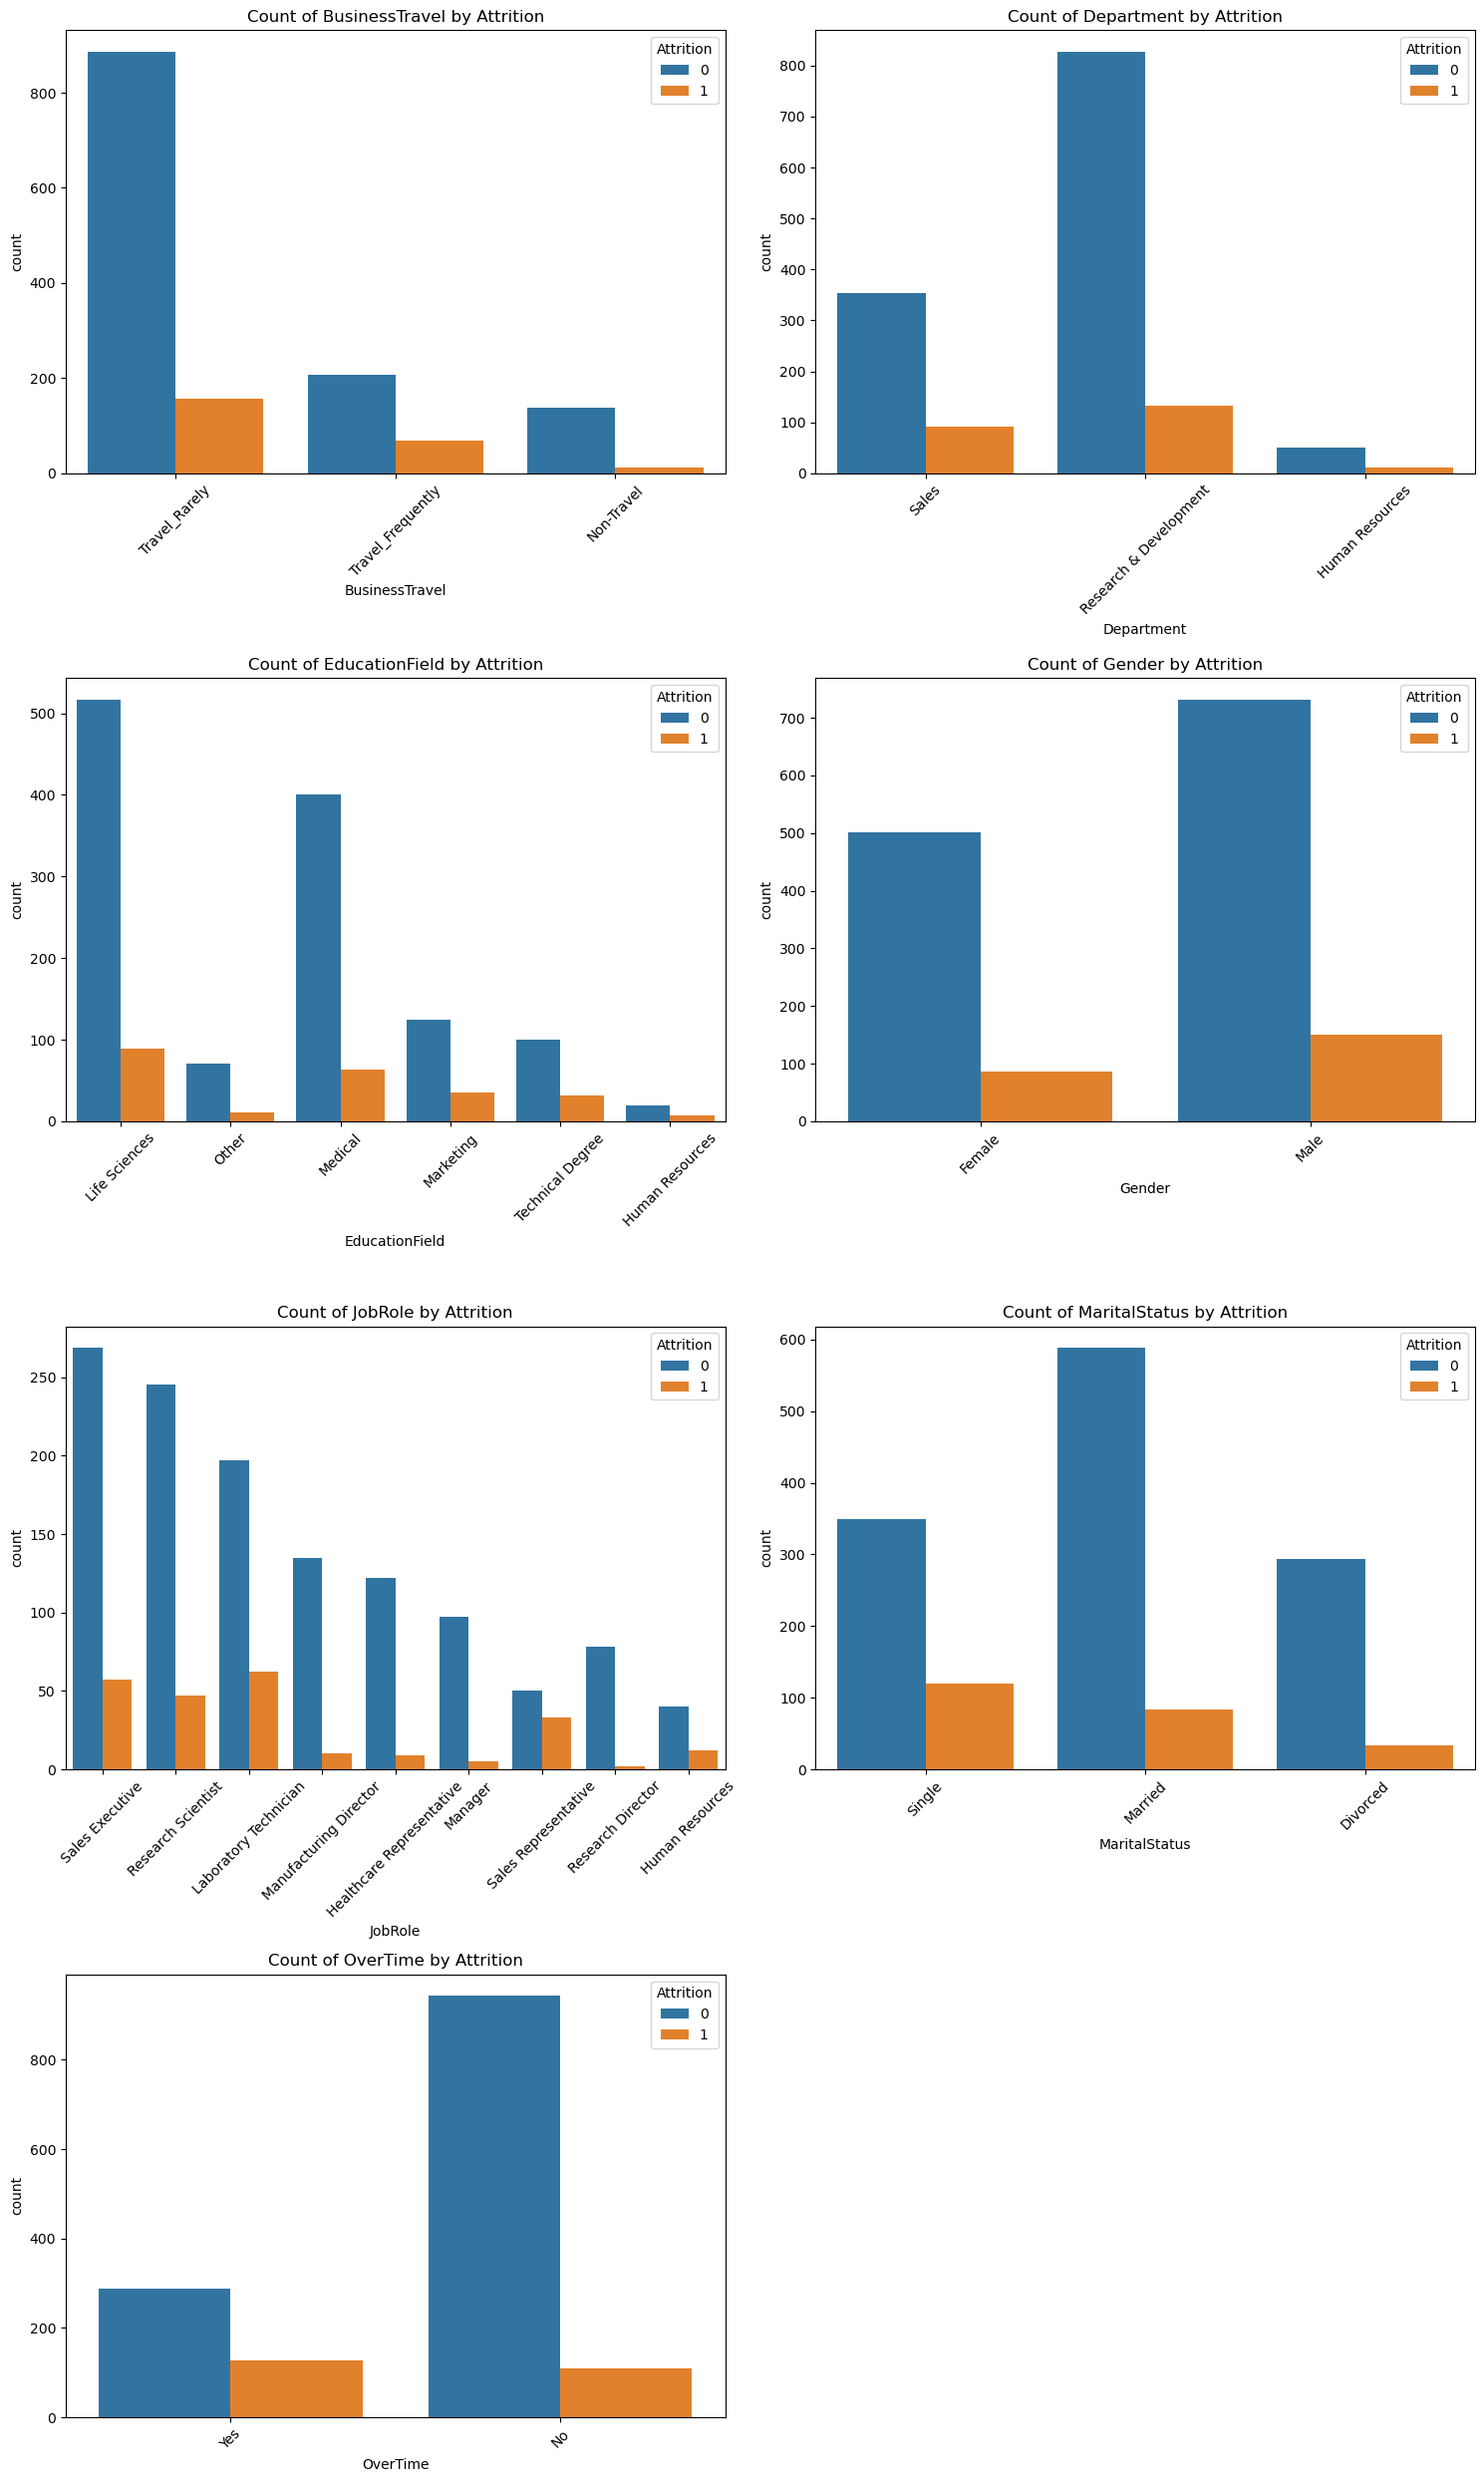

In [872]:
import matplotlib.gridspec as gridspec

categorical_col = [col for col, dtype in data.dtypes.items() if dtype == 'object']

# Categorical Columns
fig = plt.figure(figsize=(15, 25))
rows = len(categorical_col) // 2 + len(categorical_col) % 2

for i, col in enumerate(categorical_col):
    ax = fig.add_subplot(rows, 2, i+1)  # Adjust rows dynamically
    sns.countplot(x=col, hue='Attrition', data=data, ax=ax)
    ax.set_title(f'Count of {col} by Attrition')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



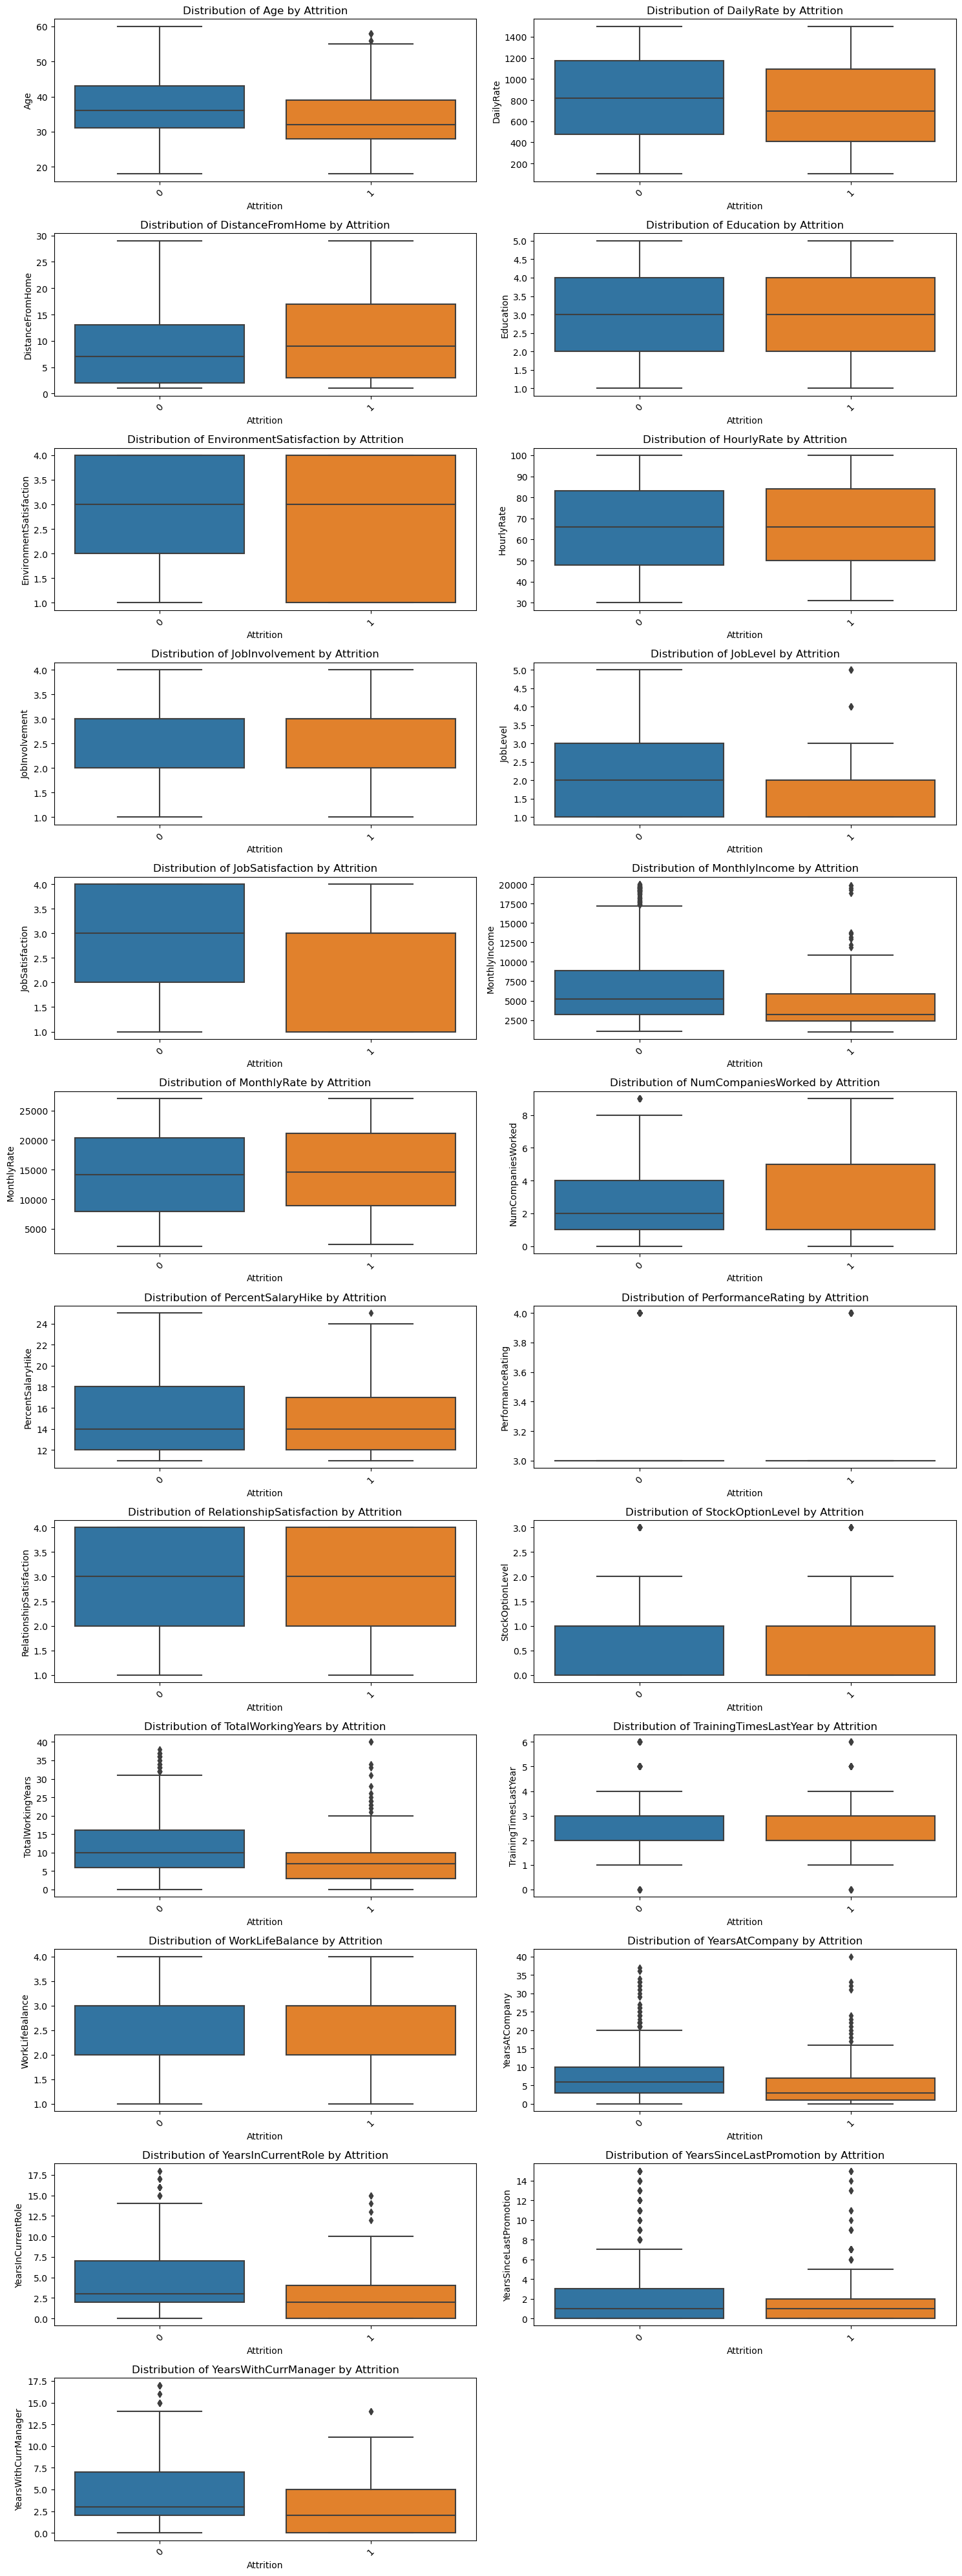

In [873]:
# Numerical Features
numerical_col = [col for col, dtype in data.dtypes.items() if dtype == 'int64' and col != 'Attrition']

fig = plt.figure(figsize=(15, 40))  
rows = len(numerical_col) // 2 + len(numerical_col) % 2

for i, col in enumerate(numerical_col):
    ax = fig.add_subplot(rows, 2, i+1)
    sns.boxplot(x='Attrition', y=col, data=data, ax=ax)
    ax.set_title(f'Distribution of {col} by Attrition')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


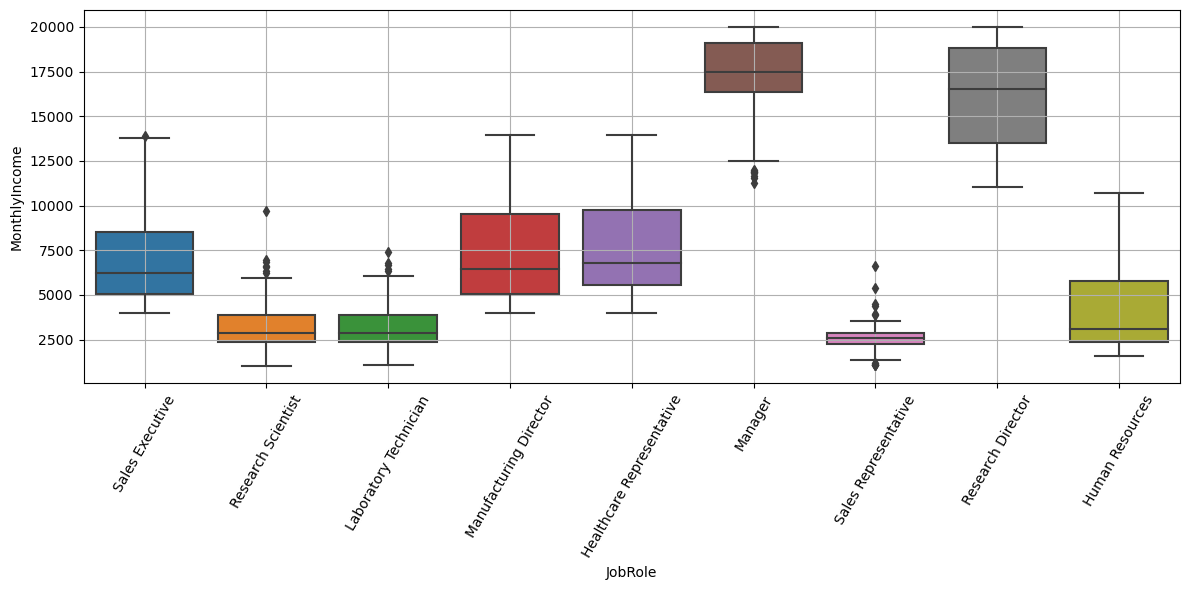

In [874]:
# Set the figure size with a wider width
plt.figure(figsize=(12, 6))  # 12 units wide and 6 units tall

# Create a boxplot
ax = sns.boxplot(y=data['MonthlyIncome'], x=data['JobRole'])

# Rotate x-axis labels to 45 degrees for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# Display grid with specified alpha value
plt.grid(True, alpha=1)

# Adjust the layout to ensure it fits well
plt.tight_layout()

# Show the plot
plt.show()


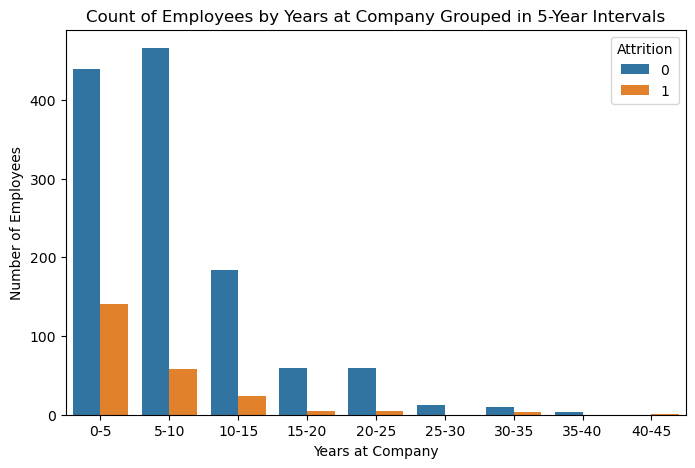

In [875]:
# Group 'YearsAtCompany' into 5-year intervals, capped at 45
data['YearsAtCompany_Grouped'] = pd.cut(data['YearsAtCompany'], 
                                        bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45], 
                                        labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45'], 
                                        right=False)

# Create the countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='YearsAtCompany_Grouped', hue='Attrition', data=data, order=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45'])
plt.title("Count of Employees by Years at Company Grouped in 5-Year Intervals")
plt.xlabel("Years at Company")
plt.ylabel("Number of Employees")
plt.show()


# Correlation Matrix

<Axes: >

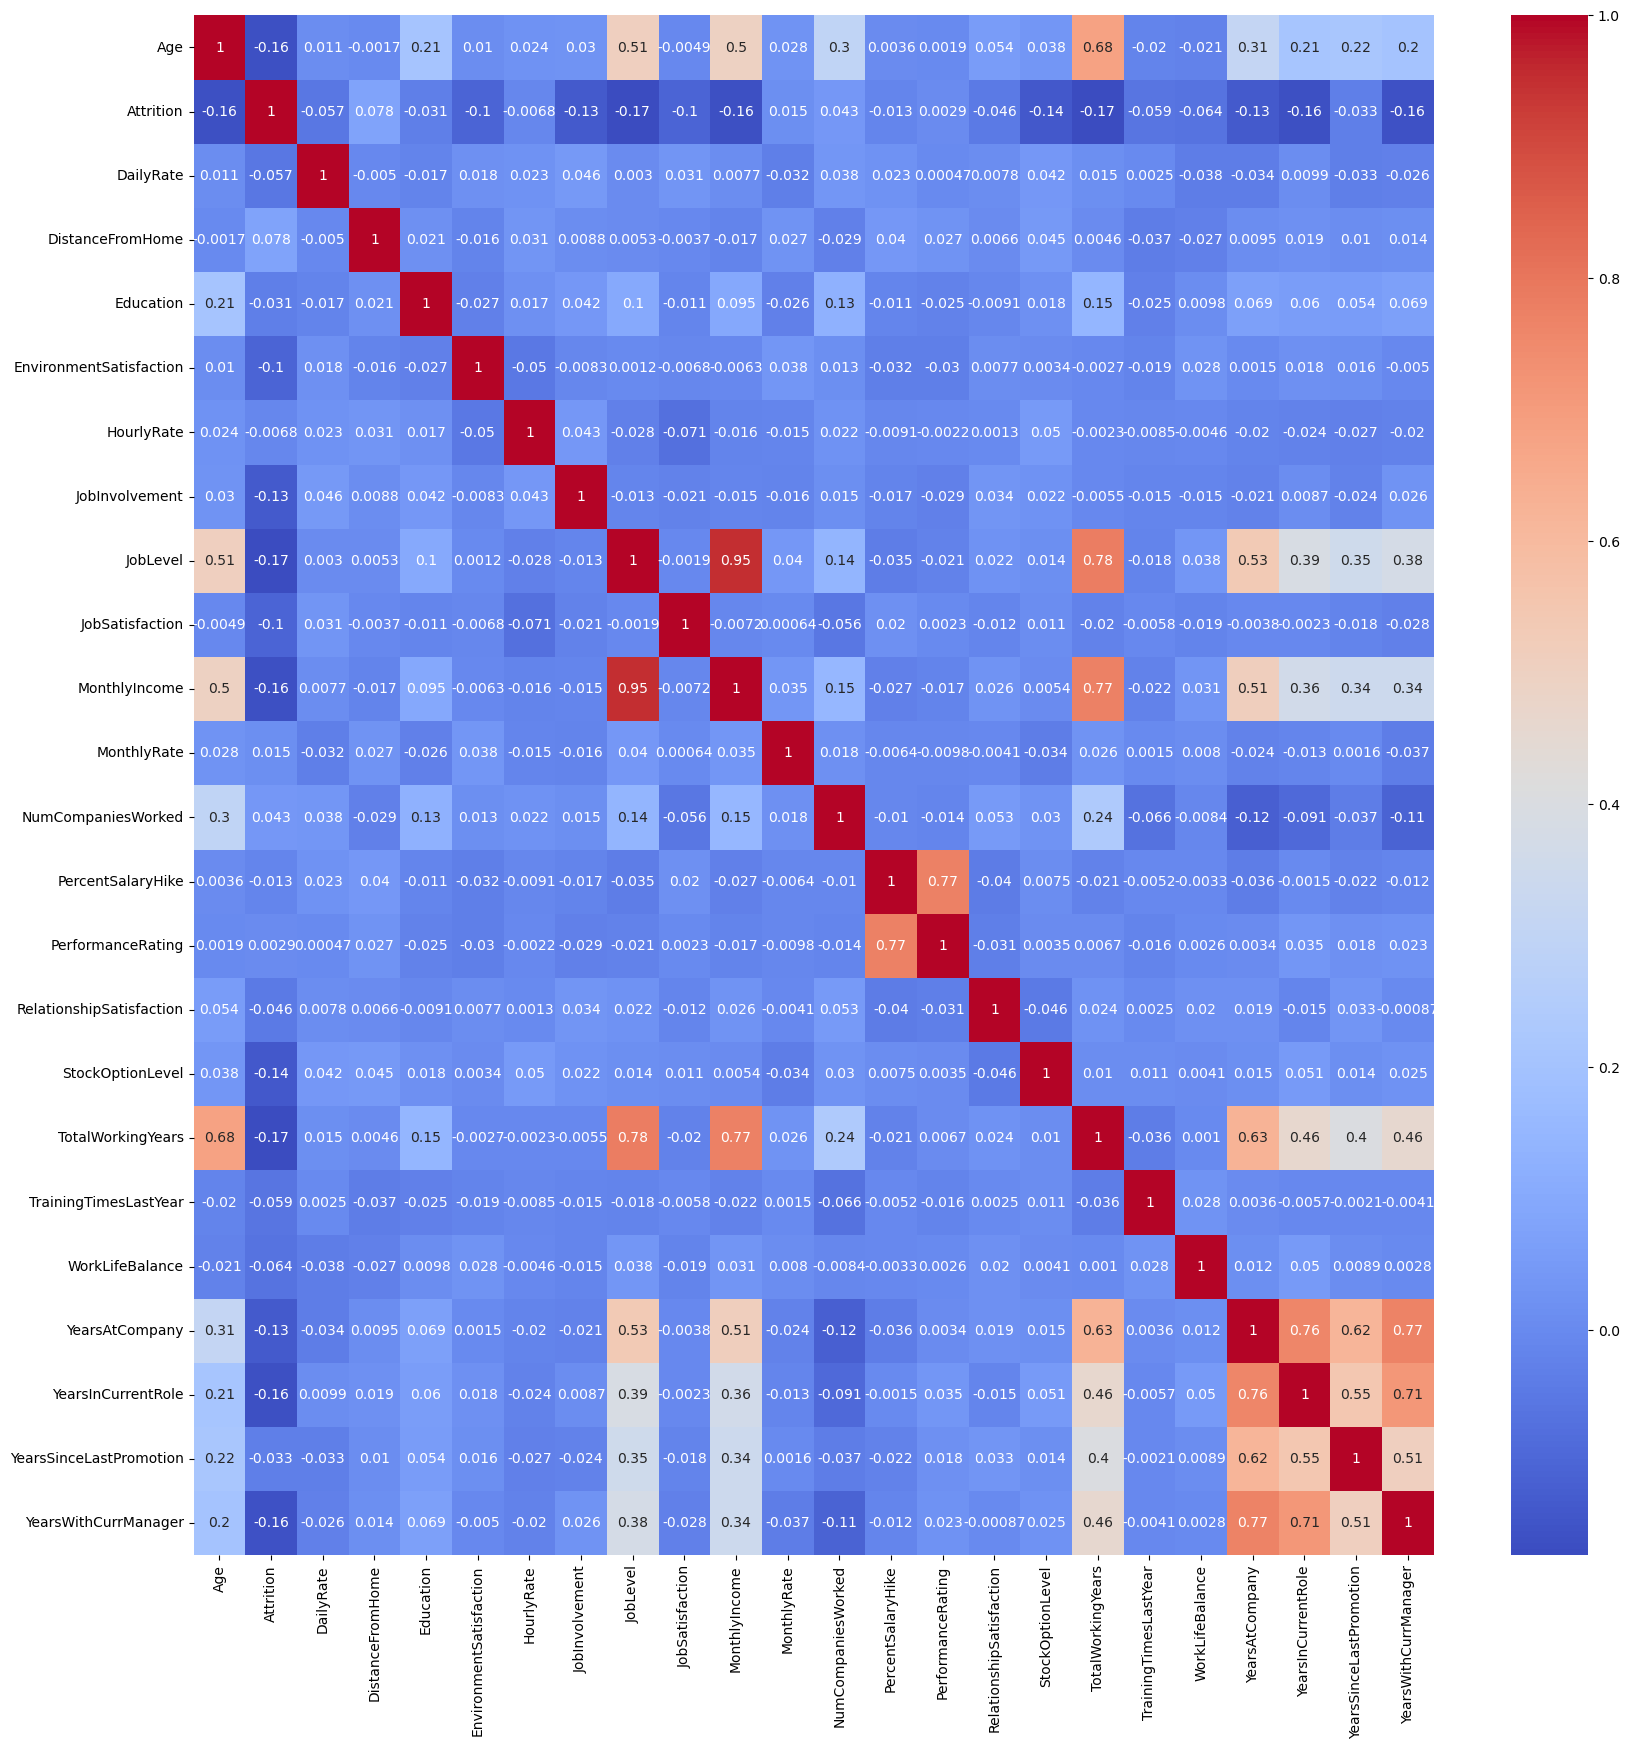

In [876]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", annot_kws={"size":10})



<Axes: >

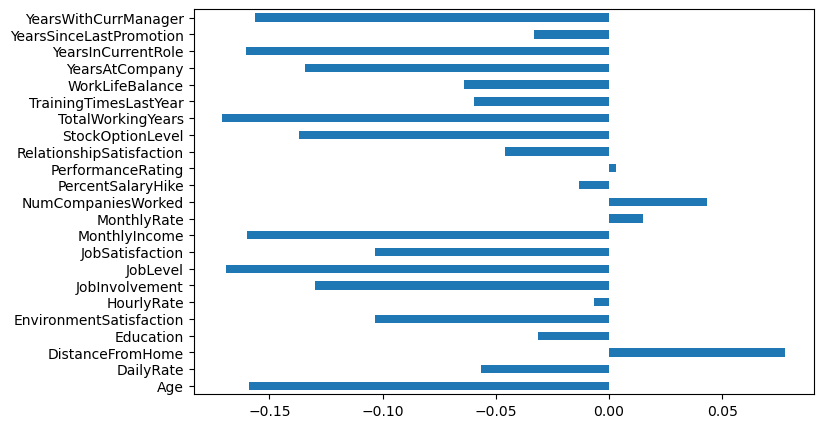

In [877]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).plot(kind='barh', figsize=(8, 5))


In [907]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'YearsAtCompany_Grouped'],
      dtype='object')

# Feature Selection

# Chi-Square Test 

In [908]:
# Using Chi-Square Test to Analyze the Categorical Feature Importance in Employee Attrition
# Get all columns except the target
variables = [col for col in data.columns if col != 'Attrition']

# Target variable
target = 'Attrition'

# Variables to deselect
deselected_vars = []

# Perform Chi-Square Test for each variable
for var in variables:
    contingency_table = pd.crosstab(data[var], data[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # If p-value is more than 0.05 (Level of Significance) or chi2 is less than the table value, deselect the variable
    if p > 0.05:  # You can also add condition for table value here if needed
        deselected_vars.append(var)

print("Variables to deselect based on Chi-Square Test:", deselected_vars)


Variables to deselect based on Chi-Square Test: ['DailyRate', 'DistanceFromHome', 'Education', 'Gender', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'YearsSinceLastPromotion']


In [909]:
# Drop the columns
columns_to_drop = [
    'DailyRate', 'DistanceFromHome',
    'Education', 'Gender','MonthlyIncome', 'HourlyRate',  'MonthlyRate',
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'YearsSinceLastPromotion', 'JobLevel', 'YearsAtCompany'
]

new_data = data.drop(columns=columns_to_drop)
new_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'YearsAtCompany_Grouped'],
      dtype='object')

# Preparing Dataset

In [910]:
# Convert categorical features in the new_data DataFrame into numerical labels using label encoding. 
def transform(feature):
    le=LabelEncoder()
    new_data[feature]=le.fit_transform(new_data[feature])
    print(le.classes_)

In [911]:
cat_data=new_data.select_dtypes(include='object')
cat_data.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [912]:
for col in cat_data.columns:
    transform(col)

['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [913]:
# verify the dataset
new_data.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager,YearsAtCompany_Grouped
0,41,1,2,2,1,2,3,7,4,2,8,1,0,8,0,1,4,5,5-10
1,49,0,1,1,1,3,2,6,2,1,1,0,1,10,3,3,7,7,10-15
2,37,1,2,1,4,4,2,2,3,2,6,1,0,7,3,3,0,0,0-5
3,33,0,1,1,1,4,3,6,3,1,1,1,0,8,3,3,7,0,5-10
4,27,0,2,1,3,1,3,2,2,1,9,0,1,6,3,3,2,2,0-5


In [914]:
# Feature Scaling.
# Using standardScaler to scale the data.
scaler = StandardScaler()

# Drop 'Attrition' and 'YearsAtCompany_Grouped' columnsn cause 'Attrition' is Y variable and 'YearsAtCompany_Grouped' is group data.
scaled_data = scaler.fit_transform(new_data.drop(['Attrition', 'YearsAtCompany_Grouped'], axis=1))

X = scaled_data
Y = new_data['Attrition'].values 




In [915]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Data Modeling

In [916]:
# Handling the Imbalanced dataset
# Method 1: Oversampling the Minority or Undersampling the Majority Class


oversampler = SMOTE(random_state=42)
x_train_smote, y_train_smote = oversampler.fit_resample(x_train, y_train)

#  Building the Model & Making Predictions without dealing with imbalanced dataset

In [917]:
# Unified function for model evaluation
def evaluate_model(model, x_train_data, y_train_data, x_test_data, y_test_data, acc, prec, rec, auroc, f1s):
    clf = model
    clf.fit(x_train_data, y_train_data)
    pred = clf.predict(x_test_data)

    # Calculating various metrics
    acc.append(accuracy_score(pred, y_test_data))
    prec.append(precision_score(pred, y_test_data))
    rec.append(recall_score(pred, y_test_data))
    auroc.append(roc_auc_score(pred, y_test_data))
    f1s.append(f1_score(pred, y_test_data))

In [918]:
# Building the Model & Making Predictions without SMOTE
accuracy_scores = []
precision_scores = []
recall_scores = []
roc_scores = []
f1_scores = []

for model in model_list:
    evaluate_model(model, x_train, y_train, x_test, y_test, accuracy_scores, precision_scores, recall_scores, roc_scores,f1_scores)

results = {
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'ROC AUC': roc_scores,
    'F1 Score': f1_scores
}

results_df = pd.DataFrame(results)

In [919]:
results_df

,Model,Accuracy,Precision,Recall,ROC AUC,F1 Score
0,RBF SVM,0.877717,0.125000,0.666667,0.774838,0.210526
1,Random Forest,0.864130,0.104167,0.416667,0.647940,0.166667
2,Gradient Boosting,0.875000,0.312500,0.535714,0.719328,0.394737
3,Decision Tree,0.812500,0.375000,0.315789,0.609663,0.342857
4,XGBoost,0.861413,0.312500,0.454545,0.678019,0.370370
5,Logistic Regression,0.894022,0.312500,0.714286,0.809592,0.434783


#  Building the Model & Making Predictions with SMOTE

In [920]:
# Building the Model & Making Predictions with SMOTE
accuracy_scores_smote = []
precision_scores_smote = []
recall_scores_smote = []
roc_scores_smote = []
f1_scores_smote = []

for model in model_smote_list:
    evaluate_model(model, x_train_smote, y_train_smote, x_test, y_test, accuracy_scores_smote, precision_scores_smote, recall_scores_smote, roc_scores_smote, f1_scores_smote)


In [921]:
results_smote = {
    'Model': model_smote_names,
    'Accuracy': accuracy_scores_smote,
    'Precision': precision_scores_smote,
    'Recall': recall_scores_smote,
    'ROC AUC': roc_scores_smote,
    'F1 Score': f1_scores_smote
}

results_smote_df = pd.DataFrame(results_smote)           

In [922]:
results_smote_df

,Model,Accuracy,Precision,Recall,ROC AUC,F1 Score
0,RBF SVM,0.836957,0.458333,0.392857,0.654762,0.423077
1,Random Forest,0.850543,0.270833,0.393939,0.644731,0.320988
2,Gradient Boosting,0.864130,0.333333,0.470588,0.687390,0.390244
3,Decision Tree,0.766304,0.333333,0.228571,0.560594,0.271186
4,XGBoost,0.869565,0.375000,0.500000,0.704819,0.428571
5,Logistic Regression,0.736413,0.583333,0.266667,0.595311,0.366013


# Improve the performance of post-SMOTE model

In [923]:
# Define the hyperparameter grid for each model
param_grids = {
    'RBF SVM': {
        'C': [0.1, 1, 10],
        'gamma': [0.1, 1, 'auto', 'scale'],
        'kernel': ['rbf']
    },
    'Random Forest': {
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, None],
        'max_features': ['auto', 'sqrt'],
        'n_estimators': [50, 100, 150]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5]
    },
    'Decision Tree': {
        'max_depth': [10, 20, 30, None],
        'criterion': ['gini', 'entropy']
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 4, 5]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    }
}

In [924]:
# Setup model list and names
models = {
    'RBF SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression()
}


In [925]:
# Use RandomizedSearchCV for hyperparameter tuning
best_params = {}
for model_name, model in models.items():
    random_search = RandomizedSearchCV(model, param_grids[model_name], n_iter=100, cv=10, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(x_train_smote, y_train_smote)
    best_params[model_name] = random_search.best_params_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

In [926]:
accuracy_scores_smote_tuned = []
precision_scores_smote_tuned = []
recall_scores_smote_tuned = []
roc_scores_smote_tuned = []
f1_scores_smote_tuned = []

for model_name, model in models.items():
    model.set_params(**best_params[model_name])
    evaluate_model(model, x_train_smote, y_train_smote, x_test, y_test, accuracy_scores_smote_tuned, precision_scores_smote_tuned, recall_scores_smote_tuned, roc_scores_smote_tuned, f1_scores_smote_tuned)

results_smote_tuned = {
    'Model': list(models.keys()),
    'Accuracy': accuracy_scores_smote_tuned,
    'Precision': precision_scores_smote_tuned,
    'Recall': recall_scores_smote_tuned,
    'ROC AUC': roc_scores_smote_tuned,
    'F1 Score': f1_scores_smote_tuned
}

results_smote_df_tuned = pd.DataFrame(results_smote_tuned)
print(results_smote_df_tuned)

                 Model  Accuracy  Precision    Recall   ROC AUC  F1 Score
0              RBF SVM  0.866848   0.354167  0.485714  0.696311  0.409639
1        Random Forest  0.847826   0.187500  0.346154  0.616059  0.243243
2    Gradient Boosting  0.853261   0.333333  0.421053  0.662041  0.372093
3        Decision Tree  0.788043   0.479167  0.302632  0.608508  0.370968
4              XGBoost  0.869565   0.333333  0.500000  0.702381  0.400000
5  Logistic Regression  0.744565   0.583333  0.274510  0.599661  0.373333


# Feature Importance

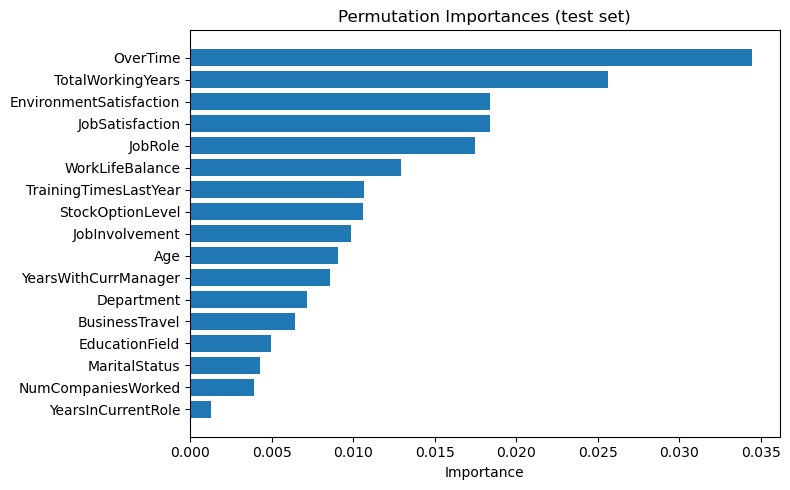

In [929]:
clf = XGBClassifier() 
clf.fit(x_train_smote, y_train_smote)

# Calculate permutation importances
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, x_test, y_test, n_repeats=30, random_state=42)
sorted_idx = result.importances_mean.argsort()

# Visualize with a bar chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(new_data.drop(['Attrition', 'YearsAtCompany_Grouped'], axis=1).columns[sorted_idx], result.importances_mean[sorted_idx])
ax.set_title("Permutation Importances (test set)")
ax.set_xlabel('Importance')
plt.tight_layout()
plt.show()

# Conclusions